<a href="https://colab.research.google.com/github/waigani64/Chemical-Modeling/blob/main/Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

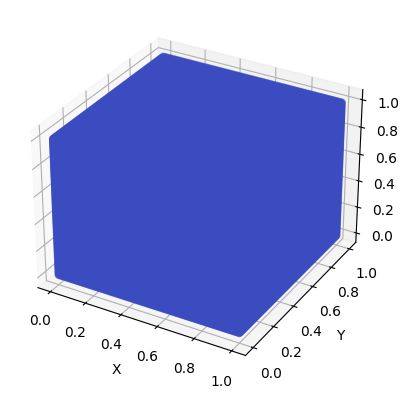

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
D = 1e-5  # Diffusion coefficient
dt = 0.001  # Time step
dx = dy = dz = 0.01  # Spatial step
L = 1.0  # Length of the glass
T = 1.0  # Total simulation time

# Grid parameters
nx = int(L / dx)
ny = int(L / dy)
nz = int(L / dz)

# Initialize concentration grid
C = np.zeros((nx, ny, nz))
C_new = np.zeros((nx, ny, nz))

# Set initial conditions
C[int(nx / 2), int(ny / 2), int(nz / 2)] = 1.0  # Concentration at the center

# Simulation
t = 0.0
while t < T:
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            for k in range(1, nz - 1):
                C_new[i, j, k] = C[i, j, k] + (D * dt / (dx ** 2)) * (C[i + 1, j, k] + C[i - 1, j, k] - 2 * C[i, j, k]) \
                                 + (D * dt / (dy ** 2)) * (C[i, j + 1, k] + C[i, j - 1, k] - 2 * C[i, j, k]) \
                                 + (D * dt / (dz ** 2)) * (C[i, j, k + 1] + C[i, j, k - 1] - 2 * C[i, j, k])

    C = np.copy(C_new)
    t += dt

# Plotting
x = np.linspace(0, L, nx)
y = np.linspace(0, L, ny)
z = np.linspace(0, L, nz)
X, Y, Z = np.meshgrid(x, y, z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=C, cmap='coolwarm')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
